In [110]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Read file
filename = 'INF2178_A3_data.csv'
data = pd.read_csv(filename)
# Calculate the change in scores
data['delta_readingscore'] = data['springreadingscore'] - data['fallreadingscore']
data['delta_mathscore'] = data['springmathscore'] - data['fallmathscore']
data['delta_generalknowledge'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']
df = data.drop(['totalhouseholdincome', 'incomeinthousands'],axis=1)
df

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup,delta_readingscore,delta_mathscore,delta_generalknowledge
0,36.58,39.54,33.822,49.37,50.10,40.533,3,12.79,10.56,6.711
1,50.82,44.44,38.147,83.50,58.93,37.409,3,32.68,14.49,-0.738
2,40.68,28.57,28.108,40.41,32.81,29.312,3,-0.27,4.24,1.204
3,32.57,23.57,15.404,34.14,35.25,27.382,2,1.57,11.68,11.978
4,31.98,19.65,18.727,32.84,23.60,26.977,2,0.86,3.95,8.250
...,...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,1,13.12,-1.41,8.495
11929,31.96,25.73,21.461,47.84,40.35,32.357,1,15.88,14.62,10.896
11930,40.44,30.50,16.836,49.93,41.00,19.803,2,9.49,10.50,2.967
11931,35.51,28.96,28.864,51.60,50.27,35.991,1,16.09,21.31,7.127


# EDA

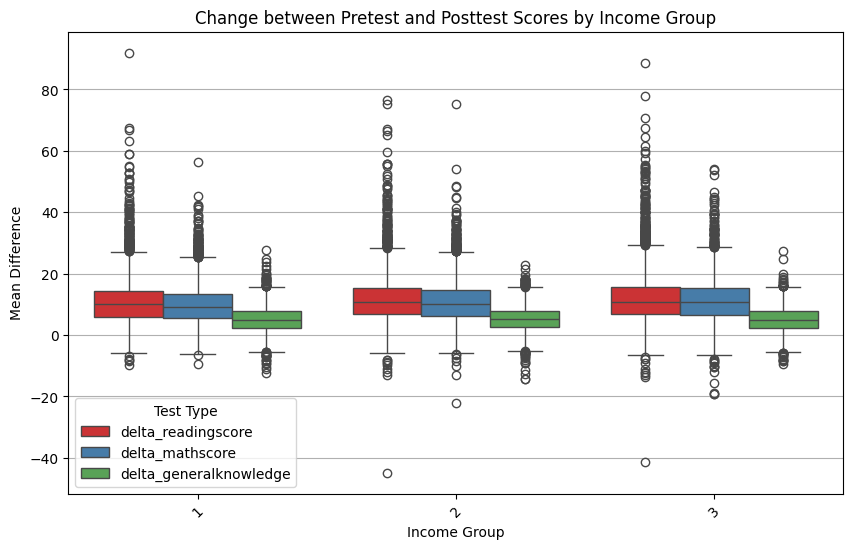

In [111]:
# Melt the dataframe to long format for boxplot
df_melted = df.melt(id_vars=['incomegroup'], value_vars=['delta_readingscore', 'delta_mathscore', 'delta_generalknowledge'],
                    var_name='Test Type', value_name='Mean Difference')

# Visualize the mean difference using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='incomegroup', y='Mean Difference', hue='Test Type', palette='Set1')
plt.title('Change between Pretest and Posttest Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Difference')
plt.xticks(rotation=45)
plt.legend(title='Test Type')
plt.grid(axis='y')
plt.show()



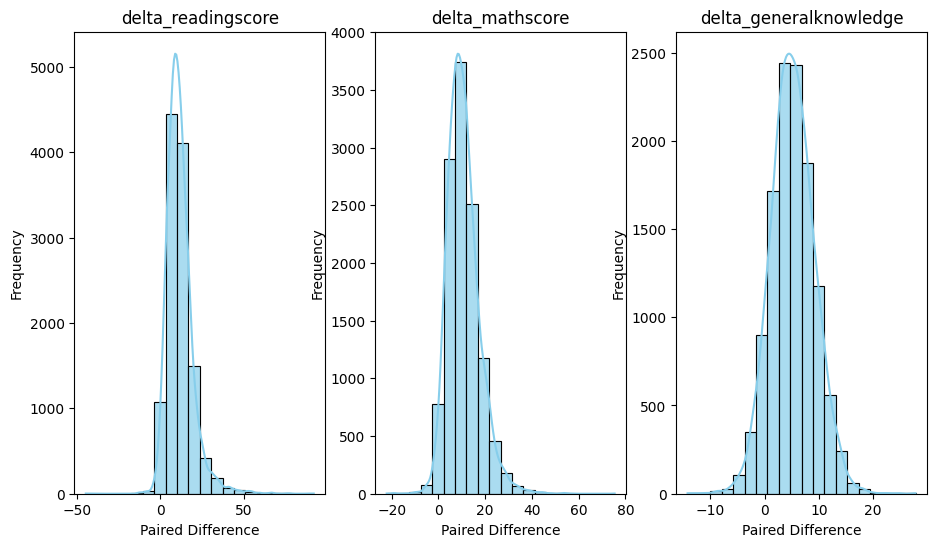

In [112]:

plt.figure(figsize=(11, 6))

# Iterate over each test type
for i, test_type in enumerate(['delta_readingscore', 'delta_mathscore', 'delta_generalknowledge']):
    # Create a subplot for each test type
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=test_type, bins=20, kde=True, color='skyblue', alpha=0.7)
    plt.title(f'{test_type}')
    plt.xlabel('Paired Difference')
    plt.ylabel('Frequency')
plt.show()

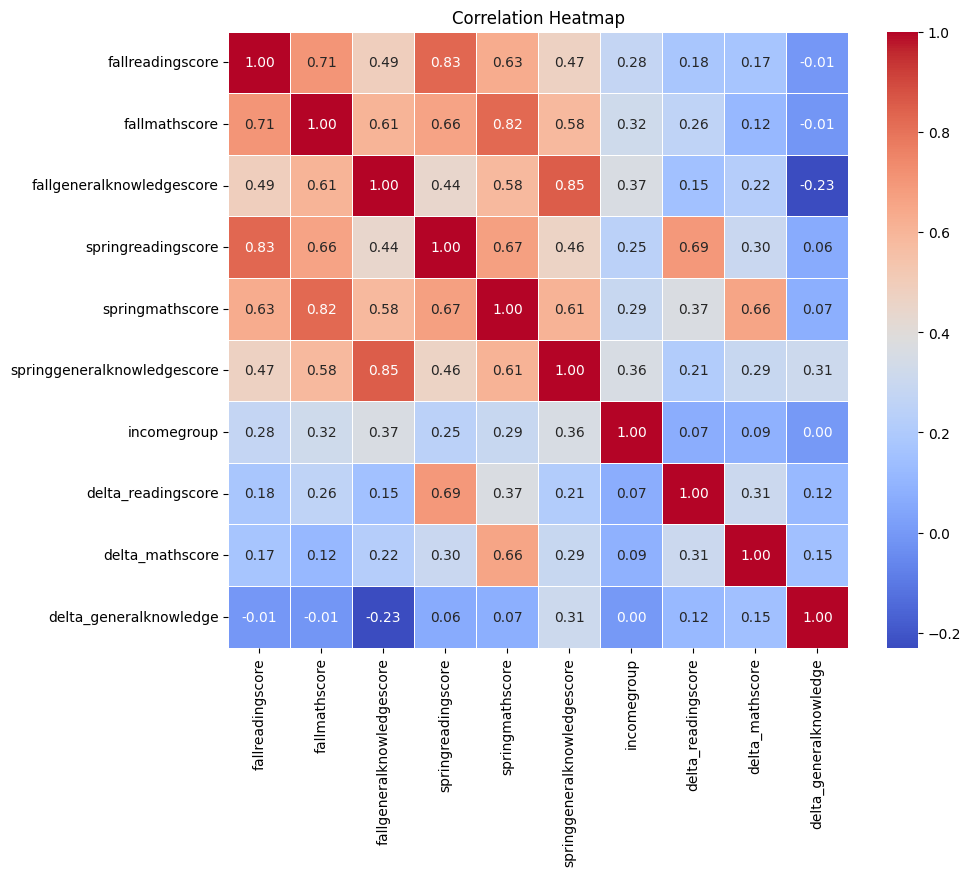

In [113]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Functions Used

In [114]:

def categorical_boxplot(dataset, categorical_column, quantitative_columns):
    """
    Create a visualization with color-coded boxplots for each level of the categorical variable.

    Parameters:
    - dataset (pd.DataFrame): The dataset containing the data.
    - categorical_column (str): The column name of the categorical variable.
    - quantitative_columns (list(str)): A list containing column names of the quantitative variables.

    Returns:
    - None: Displays the color-coded boxplots.
    """
    # Melt the dataset for a catplot
    melted_data = pd.melt(dataset, id_vars=[categorical_column], value_vars=quantitative_columns)

    # Create a catplot using seaborn
    g = sns.catplot(x=categorical_column, y="value", hue="variable", data=melted_data, kind="box", aspect=2.5, palette=sns.color_palette('Set2', len(quantitative_columns)))

    # Set axis labels
    g.set_axis_labels(x_var=categorical_column)

    # Show the plot
    plt.show()


In [115]:
def get_summary_statistics(dataset, dataset_name):
    '''
    Calculate and display summary statistics for a given dataset.

    Parameters:
    - dataset (pandas.Series): The dataset for which summary statistics are calculated.
    - dataset_name (str): The name of the dataset.

    Returns:
    - Summary Table: Displays the summary statistics table.
    '''

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    sd = np.round(np.std(dataset),2)

    # Calculate IQR
    q1 = np.percentile(dataset, 25)
    q3 = np.percentile(dataset, 75)
    iqr = np.round(q3 - q1, 2)

    # Create a formatted table
    summary_table = pd.DataFrame({
        'Statistic': ['Mean', 'Median','Standard Deviation','IQR'],
        'Value': [mean, median, sd, iqr]})
    summary_table.set_index(keys=summary_table['Statistic'],inplace=True)
    summary_table.drop(columns='Statistic',inplace=True)
    return summary_table


# Research Question 1 ANCOVA Models

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANCOVA model
model = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,1.475673e+05,7.378367e+04,1166.360497,0.0
fallreadingscore,1.0,1.547042e+06,1.547042e+06,24455.397576,0.0
Residual,11929.0,7.546256e+05,6.325975e+01,NaN,NaN


In [117]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANCOVA model for MATH
math_model = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=df).fit()
# Create the ANOVA table
anova_table = sm.stats.anova_lm(math_model)
math_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:01:02   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011      0.199     41.273      0.000       7.812       8.591
C(incomegroup)[T.2]     0.6700      0.151      4.430      0.000       0.374       0.966
C(incomegroup)[T.3]     0.9199      0.160      5.741      0.000       0.606       1.234
fallmathscore           1.0735      0.007    149.007      0.000       1.059       1.088
==============================================================================
Omnibus:                     1782.310   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5069.769
Skew:                           0.802   Prob(JB):                         0.00
Kurtosis:                       5.761   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
round(anova_table,2)

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,148176.48,74088.24,1602.54,0.0
fallmathscore,1.0,1026488.97,1026488.97,22203.08,0.0
Residual,11929.0,551499.44,46.23,NaN,NaN


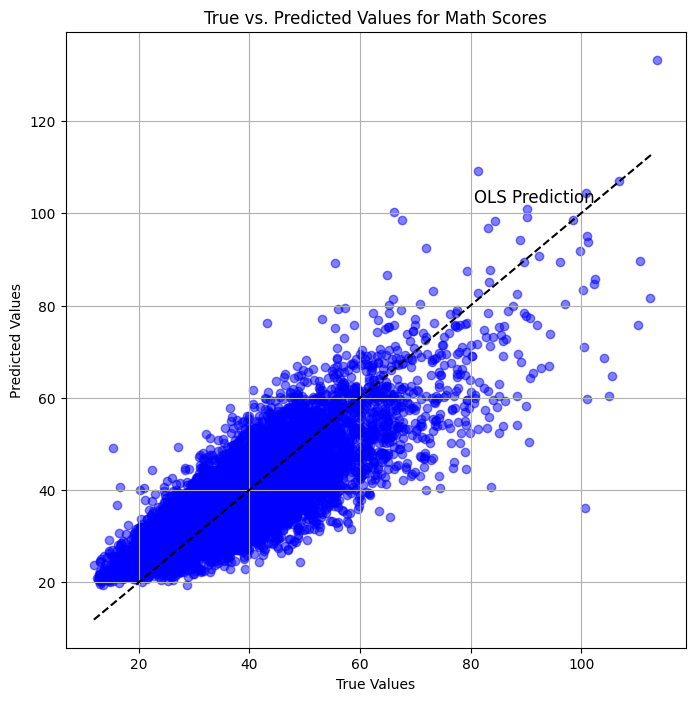

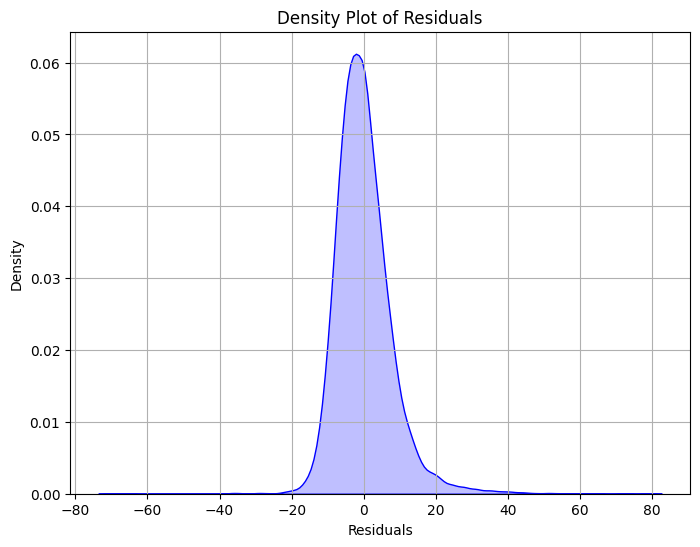

In [119]:

# Extract the true values (observed values) and the predicted values from the model
y_true = df['springmathscore']  # True values from the DataFrame
y_pred = math_model.fittedvalues  # Predicted values from the OLS model

# Plot the true relationship vs. OLS predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)  # Scatter plot of true vs. predicted values
plt.plot(np.arange(min(y_true), max(y_true), 1), np.arange(min(y_true), max(y_true), 1), color='black', linestyle='--')  # Diagonal line representing perfect predictions
# Annotate the prediction line
plt.text(0.9 * max(y_true), 0.9 * max(y_true), 'OLS Prediction', color='black', fontsize=12, ha='right')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Math Scores')
plt.grid(True)
plt.show()

# Get the residuals from the model
residuals = model.resid

# Plot the density of the residuals using a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [120]:
# Fit ANCOVA model for READING
model_reading = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()
# Create the ANOVA table
anova_table = sm.stats.anova_lm(model_reading)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,1.475673e+05,7.378367e+04,1166.360497,0.0
fallreadingscore,1.0,1.547042e+06,1.547042e+06,24455.397576,0.0
Residual,11929.0,7.546256e+05,6.325975e+01,NaN,NaN


In [121]:
model_reading.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:01:04   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430      0.264     24.779      0.000       6.025       7.061
C(incomegroup)[T.2]     0.3751      0.176      2.130      0.033       0.030       0.720
C(incomegroup)[T.3]     0.4898      0.185      2.648      0.008       0.127       0.852
fallreadingscore        1.1322      0.007    156.382      0.000       1.118       1.146
==============================================================================
Omnibus:                     3968.363   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32029.224
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                      10.543   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Research Question 2

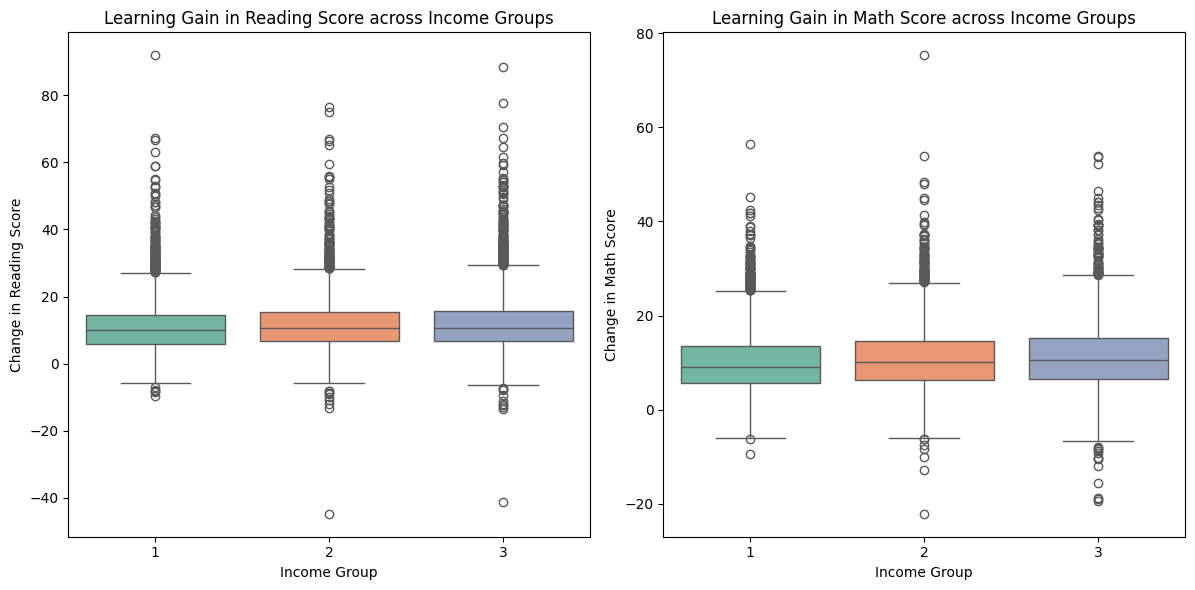

In [122]:

plt.figure(figsize=(18, 6))

# Change in reading score
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='incomegroup', y='delta_readingscore',hue='incomegroup',palette='Set2',legend=False)
plt.title('Learning Gain in Reading Score across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Change in Reading Score')

# Change in math score
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='incomegroup', y='delta_mathscore', hue='incomegroup',palette='Set2',legend=False)
plt.title('Learning Gain in Math Score across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Change in Math Score')

plt.tight_layout()
plt.show()



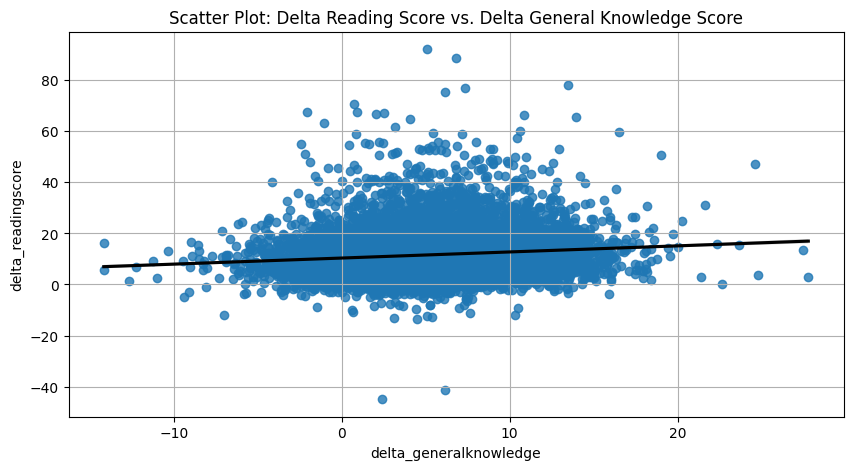

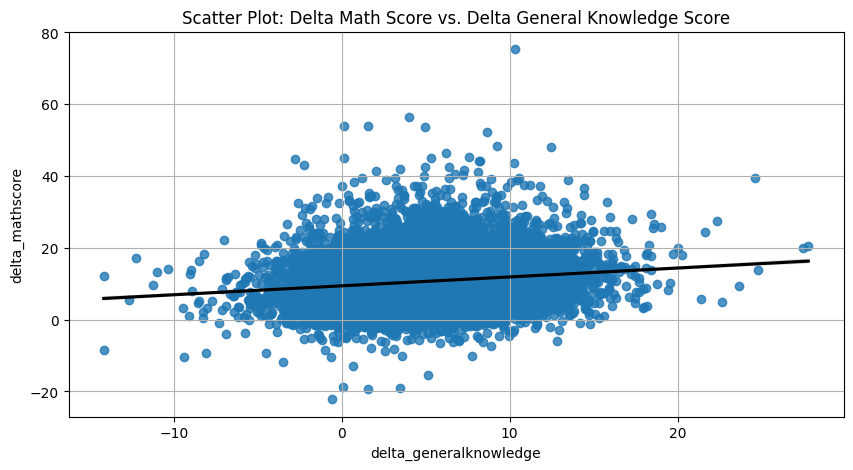

In [104]:

plt.figure(figsize=(10, 5))

# Scatter plot for delta_readingscore and delta_generalknowledge
sns.regplot(x='delta_generalknowledge', y='delta_readingscore', data=df, line_kws={"color": "black"})
plt.title('Scatter Plot: Delta Reading Score vs. Delta General Knowledge Score')

plt.grid(True)
plt.show()

# Scatter plot for delta_mathscore and delta_generalknowledge
plt.figure(figsize=(10, 5))
sns.regplot(x='delta_generalknowledge', y='delta_mathscore', data=df, line_kws={"color": "black"})
plt.title('Scatter Plot: Delta Math Score vs. Delta General Knowledge Score')

plt.grid(True)
plt.show()


In [105]:
# Perform ANCOVA
deltareading_model = ols('delta_readingscore ~ C(incomegroup) + delta_generalknowledge', data=data).fit()

# Create the ANCOVA table
anova_table = sm.stats.anova_lm(deltareading_model)
round(anova_table,2)

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,4237.40,2118.70,33.05,0.0
delta_generalknowledge,1.0,11074.22,11074.22,172.76,0.0
Residual,11929.0,764650.94,64.10,NaN,NaN


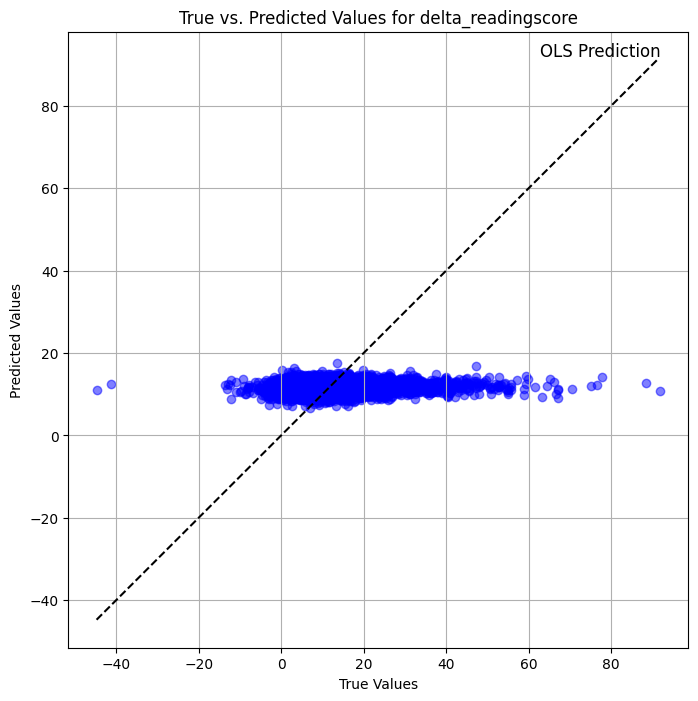

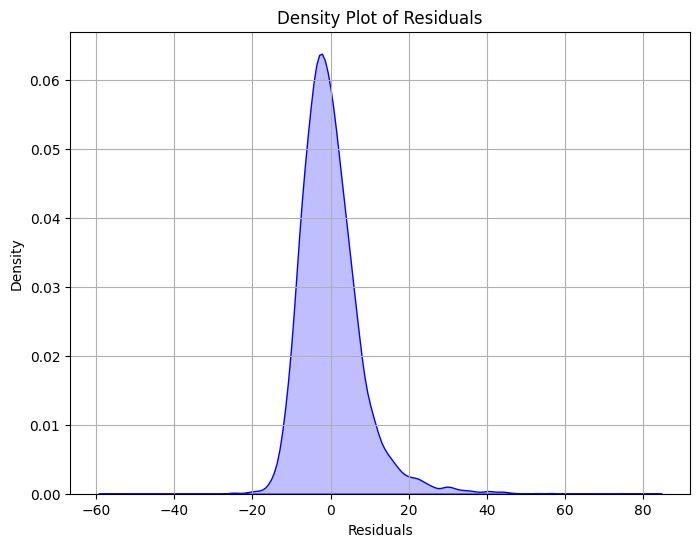

In [106]:

# Extract the true values (observed values) and the predicted values from the model
y_true = df['delta_readingscore']  # True values from the DataFrame
y_pred = deltareading_model.fittedvalues  # Predicted values from the OLS model

# Plot the true relationship vs. OLS predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)  # Scatter plot of true vs. predicted values
plt.plot(np.arange(min(y_true), max(y_true), 1), np.arange(min(y_true), max(y_true), 1), color='black', linestyle='--')  # Diagonal line representing perfect predictions
# Annotate the prediction line
plt.text(max(y_true), max(y_true), 'OLS Prediction', color='black', fontsize=12, ha='right')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for delta_readingscore')
plt.grid(True)
plt.show()

# Get the residuals from the model
residuals = deltareading_model.resid

# Plot the density of the residuals using a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [107]:
# Perform ANCOVA
deltamath_model = ols('delta_mathscore ~ C(incomegroup) + delta_generalknowledge', data=data).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(deltamath_model)
round(anova_table,2)

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,4433.58,2216.79,48.59,0.0
delta_generalknowledge,1.0,12022.65,12022.65,263.50,0.0
Residual,11929.0,544283.78,45.63,NaN,NaN


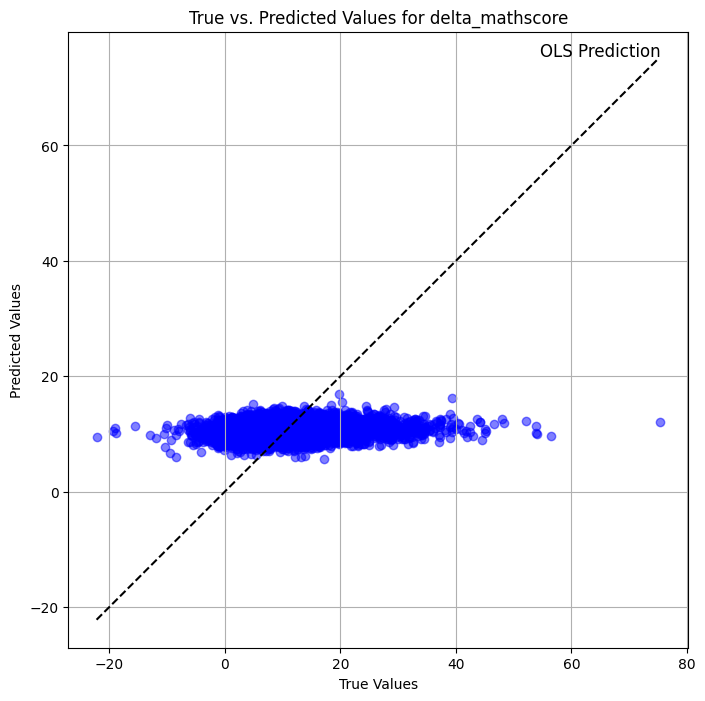

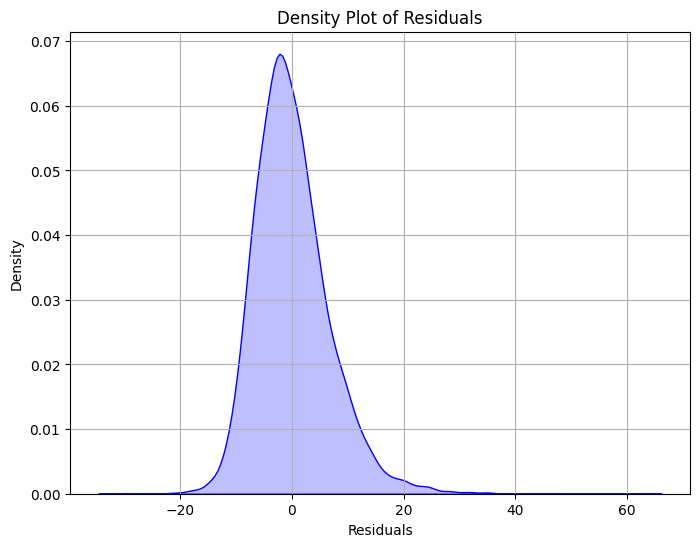

In [108]:

# Extract the true values (observed values) and the predicted values from the model
y_true = df['delta_mathscore']  # True values from the DataFrame
y_pred = deltamath_model.fittedvalues  # Predicted values from the OLS model

# Plot the true relationship vs. OLS predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)  # Scatter plot of true vs. predicted values
plt.plot(np.arange(min(y_true), max(y_true), 1), np.arange(min(y_true), max(y_true), 1), color='black', linestyle='--')  # Diagonal line representing perfect predictions
# Annotate the prediction line
plt.text(max(y_true),  max(y_true), 'OLS Prediction', color='black', fontsize=12, ha='right')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for delta_mathscore')
plt.grid(True)
plt.show()

# Get the residuals from the model
residuals = deltamath_model.resid

# Plot the density of the residuals using a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

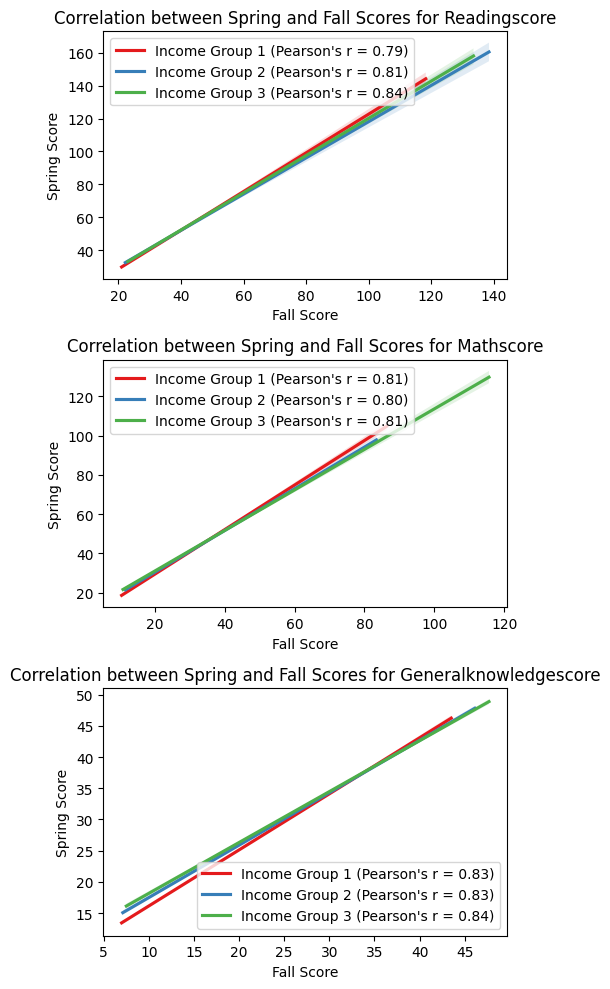

In [109]:

# Define the list of test types
test_types = ['readingscore', 'mathscore', 'generalknowledgescore']

# Create subplots for each test type
fig, axes = plt.subplots(nrows=len(test_types), ncols=1, figsize=(5, 10))

# Define a different color palette
color_palette = sns.color_palette("Set1", n_colors=len(df['incomegroup'].unique()))

# Iterate over each test type
for i, test_type in enumerate(test_types):
    # Select data for the current test type
    data = df[['incomegroup', 'fall' + test_type, 'spring' + test_type]]

    # Iterate over each income group
    for j, income_group in enumerate(sorted(df['incomegroup'].unique())):
        # Filter data for the current income group
        income_data = data[data['incomegroup'] == income_group]

        # Extract spring and fall scores
        spring_scores = income_data['spring' + test_type]
        fall_scores = income_data['fall' + test_type]
        spring_general_scores = income_data['spring' + test_type]

        # Calculate Pearson correlation coefficient
        correlation = spring_scores.corr(fall_scores)

        # Plot scatter plot with fitted line and variance
        sns.regplot(x=fall_scores, y=spring_scores,ax=axes[i],label=f"Income Group {income_group} (Pearson's r = {correlation:.2f})", line_kws={"color": color_palette[j]},scatter=False)


    # Set titles and labels for each subplot
    axes[i].set_title(f'Correlation between Spring and Fall Scores for {test_type.capitalize()}')
    axes[i].set_xlabel('Fall Score')
    axes[i].set_ylabel('Spring Score')
    axes[i].legend()

plt.tight_layout()
plt.show()
